In [92]:
import numpy as np
import re
import pandas as pd
data=pd.read_csv("update_rentdata_26102016.csv",sep=",")

In [93]:
print data.columns

Index([u'propertyCode', u'thumbnail', u'numPhotos', u'floor', u'price',
       u'propertyType', u'operation', u'size', u'exterior', u'rooms',
       u'bathrooms', u'address', u'province', u'municipality', u'district',
       u'country', u'neighborhood', u'latitude', u'longitude', u'showAddress',
       u'url', u'distance', u'hasVideo', u'newDevelopment', u'tenantNumber',
       u'tenantGender', u'hasLift', u'isSmokingAllowed', u'priceByArea'],
      dtype='object')


In [94]:
data=data[data['propertyCode']!='propertyCode']
# esto elimina los indices de las filas eliminadas--> hay que arreglarlo

In [95]:
print np.unique(data['tenantGender'])

[nan]


In [96]:
print np.unique(data['tenantNumber'])

[nan]


In [97]:
data = data.drop(['thumbnail', 'address','url','tenantGender','tenantNumber','isSmokingAllowed','distance'], axis=1)

In [98]:
data.columns

Index([u'propertyCode', u'numPhotos', u'floor', u'price', u'propertyType',
       u'operation', u'size', u'exterior', u'rooms', u'bathrooms', u'province',
       u'municipality', u'district', u'country', u'neighborhood', u'latitude',
       u'longitude', u'showAddress', u'hasVideo', u'newDevelopment',
       u'hasLift', u'priceByArea'],
      dtype='object')

In [99]:
pattern='^\d'
data['floor']=data['floor'].fillna(value='1000')
llista=[]
for element in tuple(data['floor']):
    f=bool(re.match(pattern,element))
    if f==False:
        llista=np.append(llista,element)
#print llista
for i in np.unique(llista):
    data[data['floor']==i]='0'

In [100]:
tofloat=['price','priceByArea','numPhotos','size','propertyCode','rooms','floor']
for col in tofloat:
    data[col]=data[col].astype(float)
data[data['floor']==1000]=np.nan

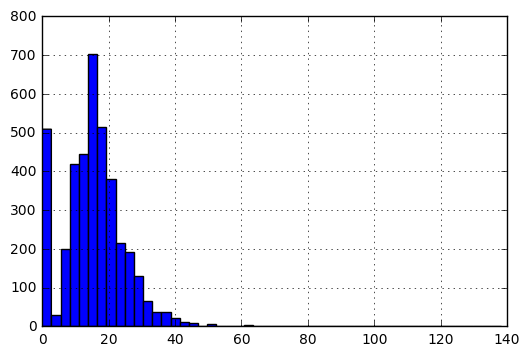

In [101]:
import matplotlib.pyplot as plt
plt.figure()
#data['priceByArea'].plot(kind='hist')
data['priceByArea'].hist(bins=50)
plt.show()

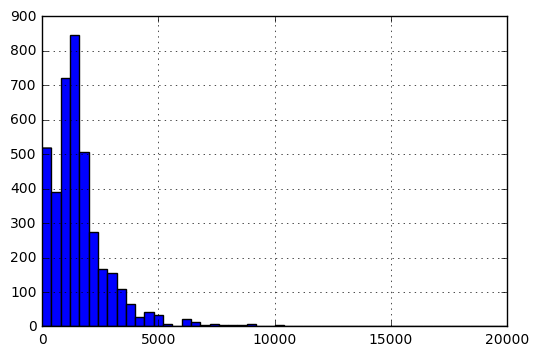

In [102]:
plt.figure()
data['price'].hist(bins=50)
plt.show()

In [103]:
print len(np.unique(data['district']))
print len(np.unique(data['neighborhood']))

106
109


/Users/alexandrenixon/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


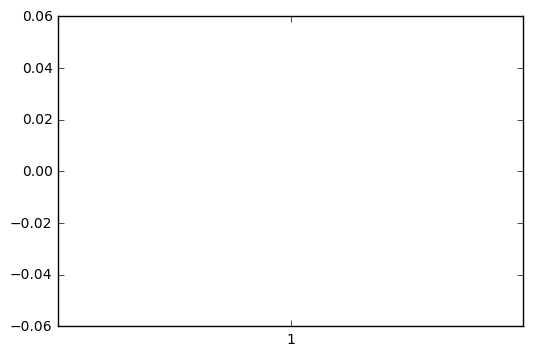

In [104]:
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(data['priceByArea'])
plt.show()

In [106]:
print data.columns

Index([u'propertyCode', u'numPhotos', u'floor', u'price', u'propertyType',
       u'operation', u'size', u'exterior', u'rooms', u'bathrooms', u'province',
       u'municipality', u'district', u'country', u'neighborhood', u'latitude',
       u'longitude', u'showAddress', u'hasVideo', u'newDevelopment',
       u'hasLift', u'priceByArea'],
      dtype='object')


In [107]:
dades=['price','priceByArea','numPhotos','size','propertyCode','rooms','floor']
data_norm=[]
for i in dades:
    data_norm.append(data[i])

In [108]:
type(data_norm)

list

In [127]:
new_data=pd.concat([data['priceByArea'],data['size'],data['rooms'],data['price'],data['floor']],axis=1)

In [115]:
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(new_data, alpha=0.2, figsize=(6, 6), diagonal='kde')
#plt.show()

In [129]:
#dades_temp=data['price'], data['priceByArea'],data['size'],data['propertyCode'],data['rooms'],data['floor']
#for i in dades_temp:
#    data_norm=(data[i]-max(data[i]))/(max(data[i]-min(data[i])))

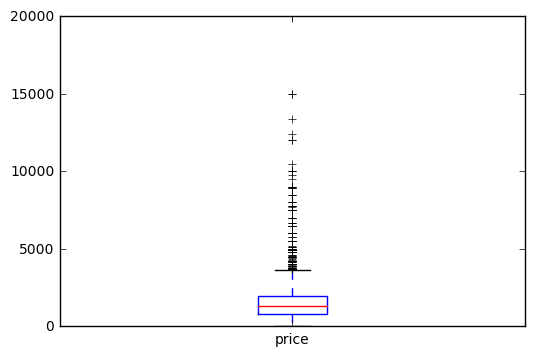

In [128]:
new_data['price'].plot(kind='box')
plt.show()